In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv("Salary_Data.csv")

In [6]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [8]:
df.shape

(30, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [15]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

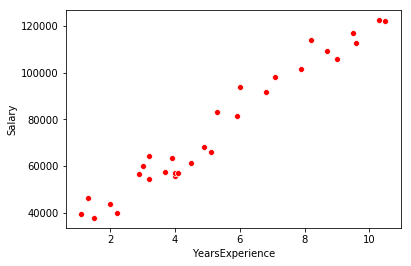

In [18]:
sns.scatterplot(x = 'YearsExperience',y = 'Salary',data = df,color = 'r')
plt.show()

### Spliting of data for Training and Test

In [27]:
X = df.iloc[:,:1].values
y = df.iloc[:,1].values

In [28]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3,random_state = 101)

In [33]:
X_test

array([[6.8],
       [8.7],
       [3.2],
       [5.9],
       [1.5],
       [9.6],
       [9.5],
       [5.1],
       [9. ]])

In [34]:
y_test

array([ 91738., 109431.,  54445.,  81363.,  37731., 112635., 116969.,
        66029., 105582.])

In [35]:
from sklearn.linear_model import LinearRegression
Regressor = LinearRegression()
Regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
Regressor.predict(X_test)

array([ 91100.58255782, 109297.20888234,  56622.76425873,  82481.12798305,
        40341.57228416, 117916.66345711, 116958.94628213,  74819.39058325,
       112170.36040726])

In [50]:
y_test

array([ 91738., 109431.,  54445.,  81363.,  37731., 112635., 116969.,
        66029., 105582.])

In [51]:
Regressor.predict([[2.0]])

array([45130.15815903])

In [40]:
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error

In [44]:
mean_absolute_error(y_test,ypred)
r2_score(y_test,ypred)

0.9746363787521536

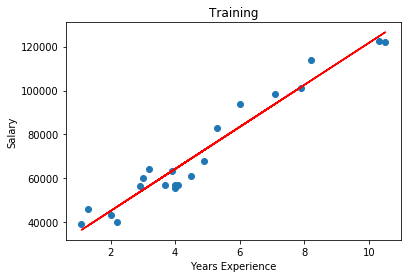

In [57]:
#plotting info for training dataset
plt.scatter(X_train, y_train)
plt.plot(X_train, Regressor.predict(X_train),color = 'r')#data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAZsAAAEWCAYAAACwtjr+AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzt3Xl8XXWd//HX27SlKUvDUpUGsEVqZXMoFgTqTxHQlhmE0gcCrlUZmHFcGH9aoY7KDMoU7CjiT0U7BQVBCkKnLAoFqePCnlKkFCyURZq0LLUNa4Sm/fz+OCfNvcnNfs89Se77+XjkkXs+9yzfG0o++ZzzXRQRmJmZZekNeTfAzMyGPycbMzPLnJONmZllzsnGzMwy52RjZmaZc7IxM7PMOdmYDTKSaiS9LGmvcu5rlid5nI3ZwEh6uWBzDPAasCXd/qeIuLLyrTIbXJxszMpI0lPAP0bEb7rZZ0REtFauVWb58200s4xJ+pakqyVdJekl4GOSDpd0t6RmSeslfV/SyHT/EZJC0oR0+4r0/ZslvSTpLkkT+7pv+v6xkh6V9IKk/yfpDkmfrOxPxKqRk41ZZZwI/AIYC1wNtAJnArsB04AZwD91c/xHgK8DuwBPA9/s676S3ghcA8xJr/skcGh/P5BZXzjZmFXGHyPixojYGhEtEXFfRNwTEa0R8QSwAHhvN8dfGxENEbEZuBI4qB/7Hgc8EBHXp+9dCGwY+Ecz69mIvBtgViXWFm5IejvwHeCdJJ0KRgD3dHP8MwWvXwV26Me+4wvbEREhqbHHlpuVgSsbs8ro2BPnJ8BDwD4RsRPwDUAZt2E9sEfbhiQB9Rlf0wxwsjHLy47AC8Arkval++c15XITcLCkD0oaQfLMaFwFrmvmZGOWky8Bs4GXSKqcq7O+YEQ8C5wCfBf4K/BWYAXJuCCzTHmcjVmVklQDrANOiog/5N0eG95c2ZhVEUkzJI2VtB1J9+hW4N6cm2VVwMnGrLq8G3iCpMvzDGBmRPg2mmXOt9HMzCxzrmzMzCxzHtSZ2m233WLChAl5N8PMbEhZvnz5hojosQu9k01qwoQJNDQ05N0MM7MhRdJferOfb6OZmVnmnGzMzCxzTjZmZpY5JxszM8uck42ZmWXOycbMzDLnZGNmZplzsjEzq1Y//zmccUZFLuVBnWZm1aa5GXbeuX17wYLML+nKxsysmnz728WJ5vHHK3JZVzZmZtXgmWdg993bt7/8ZZg/v2KXd7IxMxvuDjoI/vSn9u316+HNb65oE3wbzcxsuFq+HKT2RHPBBRBR8UQDrmzMzIanHXeEl19u337mGXjTm3JrjisbM7Ph5De/SaqZNNE8cfJsps27nYkXNjDt/GUsWdGUS7Nc2ZiZDQcR8Ibi+uGm3z/CnFufoqW5BYCm5hbmLl657f35S1ezrrmF8XW1zJk+mZlT6jNrnisbM7Oh7qqrihPNvHkQwbw71tGyeUvRri2bt/DvN6xi7uKVNDW3ELQnoSyrHlc2ZmZD1ebNMGpUcexvf4PttgNgXVrRdNTcsrlTrGXzFuYvXZ1ZdePKxsxsKPre94oTzU9/mtxKSxMNwPi62j6dsqvkVA6ZJRtJl0p6TtJDBbH5kv4s6UFJ/yOpruC9uZLWSFotaXpBfEYaWyPp7IL4REn3SHpM0tWSRqXx7dLtNen7E7L6jGZmFffKK0kHgC9+sT22ZQt88pOddp0zfTK1I2uKYrUja9h5zMiSp+5rcuqLLCubnwEzOsRuAw6IiHcAjwJzASTtB5wK7J8e8yNJNZJqgB8CxwL7AR9O9wW4ALgwIiYBm4DT0vhpwKaI2Ae4MN3PzGzo+8pXYIcd2rdvuqlkx4A2M6fUM2/WgdTX1SKgvq6WebMO5JwP7l8yCc2ZPjmzpmf2zCYift+xqoiIWws27wZOSl+fACyKiNeAJyWtAQ5N31sTEU8ASFoEnCDpEeAo4CPpPpcB/w5cnJ7r39P4tcAPJCkiomwfzsyskjZsgHHj2relpJqRejx05pT6Lp/DVLI3Wp4dBD4NXJ2+ridJPm0a0xjA2g7xdwG7As0R0Vpi//q2YyKiVdIL6f4byv0BzMwy9+EPw6JF7dt33QWHHTbg03aXhLKQS7KR9G9AK3BlW6jEbkHp23zRzf7dnatUO84AzgDYa6+9ummxmVmFPfUUTJzYvj1pEjz6aG7NGaiK90aTNBs4Dvhowa2tRmDPgt32ANZ1E98A1Eka0SFedK70/bHAxlJtiYgFETE1IqaOKyxRzczydPjhxYnmkUeGdKKBCicbSTOAs4DjI+LVgrduAE5Ne5JNBCYB9wL3AZPSnmejSDoR3JAmqd/S/sxnNnB9wblmp69PApb5eY2ZDQkPPpg8h7k7farw/vcnHQDe/vZ821UGmd1Gk3QVcCSwm6RG4ByS3mfbAbcpebB1d0T8c0SsknQN8DDJ7bXPRsSW9DyfA5YCNcClEbEqvcRZwCJJ3wJWAJek8UuAn6edDDaSJCgzs8HtzW+GZ59t325shPrKPVPJmvxHf2Lq1KnR0NCQdzPMrNr87ndw5JHt26edBgsX5tacvpK0PCKm9rSfp6sxM8tDqfExmzZBXV3p/Yc4T1djZlZp111XnGjOOSdJPsM00YArGzOzymlthZEdpoppaYHRo/NpTwW5sjEzq4SLLy5OND/5SVLNVEGiAVc2ZmbZammBMWOKY62tUFNTev9hypWNmQ0rS1Y0Me38ZUw8+1e5LoMMwDe+UZxoFi9OqpkqSzTgysbMhpElK5qYu3jlttUpC5dBruQ8YGzaBLvsUhzburVXE2cOV65szGzYmL90dcllkOcvXV25Rnz608WJ5ne/S6qZKk404MrGzIaRrlaazHIFym0aG2HPgqkcx4+Hphxv4Q0yrmzMbNjoaqXJLFegBOCYY4oTzYMPOtF04GRjZsNGV8sgZ7YC5SOPJLfHbr892X73u5NbZgcemM31hjDfRjOzYaOtE0BFVqDce2948sn27b/8BbwuVpecbMxsWMl8Bco774Rp09q3P/pRuOKK7K43TDjZmJn1RqmJMzdsgF13zac9Q4yf2ZiZ9eTGG4sTzVlnJcnHiabXXNmYmXVl69bOo/1feaXz9DPWI1c2ZmalXHppcaK56KKkmnGi6RdXNmZmhV57rfNMzJs3wwj/uhwIVzZmZm3OO6840SxalFQzTjQD5p+gmdmLL8LYscWxKp84s9xc2ZhZdfvsZ4sTze23e+LMDLiyMbPq9MwzsPvu7dtjx0Jzc37tGeZc2ZhZ9fngB4sTzf33O9FkzJWNmVWPxx6Dt72tffvgg2H58vzaU0WcbMysOhxwAKxa1b79+OPJZJpWEb6NZmbDW0ND8rC/LdHMmpV0AHCiqShXNmY2fI0enQzSbPPss/DGN+bXnirmysbMhp9bb02qmbZEc+aZSTXjRJMbVzZmNnyUmjjzxRdhxx3zaY9t48rGzIaHK64oTjTf/nZSzTjRDAqubMxsaNu8GUaNKo699lrnmOXKlY2ZDV3f+U5xUrn88qSacaIZdFzZmNnQ8/LLnW+PbdnSedlmGzT8X8bMhoQlK5qYdv4yFh56YnGiufnmpJpxohnUXNmY2aC3ZEUTP1q4lDt+dNq22Os1I/j1fU8xc0p9ji2z3srsTwFJl0p6TtJDBbFdJN0m6bH0+85pXJK+L2mNpAclHVxwzOx0/8ckzS6Iv1PSyvSY70vJfOBdXcPMhq6ZB+/BrQWJ5oSPf4e3fXkJ85euzrFV1hdZ1p0/A2Z0iJ0N3B4Rk4Db022AY4FJ6dcZwMWQJA7gHOBdwKHAOQXJ4+J037bjZvRwDTMbau69t9O6MhPOuok/jZ8MwLrmljxaZf2QWbKJiN8DGzuETwAuS19fBswsiF8eibuBOkm7A9OB2yJiY0RsAm4DZqTv7RQRd0VEAJd3OFepa5jZUCLBu961bfOUD89jwlk3Fe0yvq620q2yfqr0E7U3RcR6gPR729wR9cDagv0a01h38cYS8e6uYWZDwZIlnaqZJfc38uBbDyqK1Y6sYc70yZVsmQ3AYOkgUGr91ehHvG8Xlc4guRXHXnvt1dfDzYzk4f38patZ19zC+Lpa5kyf3P+H9h2XYl61Cvbbb9vtibJdxyqu0snmWUm7R8T69FbYc2m8EdizYL89gHVp/MgO8f9N43uU2L+7a3QSEQuABQBTp07tc7Iyq3ZLVjQxd/FKWjZvAaCpuYW5i1cC9C0R/OAH8PnPt2/X1EBra9EuM6fUO7kMYZW+jXYD0NajbDZwfUH8E2mvtMOAF9JbYEuBD0jaOe0Y8AFgafreS5IOS3uhfaLDuUpdw8zKbP7S1dsSTZuWzVt630ssIqlmChPNunWdEo0NfVl2fb4KuAuYLKlR0mnA+cD7JT0GvD/dBvg18ASwBvhv4F8AImIj8E3gvvTr3DQG8BlgYXrM48DNabyra5hZmXXVG6xXvcS+9KXigZgHHZQkn913L1PrbDDJ7DZaRHy4i7eOLrFvAJ/t4jyXApeWiDcAB5SI/7XUNcys/MbX1dJUIrF020vs9ddhu+2KYy+9BDvsUObW2WDi+R3MrN/mTJ9M7cji9WO67SV2/PHFiebUU5Nqxolm2BssvdHMbAhqe2DfYy+x5mbYucNkHps3wwj/CqoW/i9tZgPSYy+xvfeGJ59s3/761+Hcc7NvmA0qTjZmlo2nn4a3vKU4tnVr57E0VhX8zMbMyk8qTjSXXtrezdmqkisbsyGorKP2y+mBB2DKlOJYeLy0ubIxG3LaRu03NbcQtI/aX7KiKd+GScWJZulSJxrbxsnGbIgZ8Kj9clu4sPPtsQj4wAfyaY8NSr6NZjbEDGjUfrl1TDIrViQzAZh14MrGbIjpanR+Rdd2+cpXSlczTjTWBScbsyGmz6P2y6mtR9n8+e2xhx/2sxnrkZON2RAzc0o982YdSH1dLQLq62qZN+vA7HujHXts8cSZkCSZfffN9ro2LPiZjdkQVNG1XUpNnPnss/BGL4JrvedkY2ZdGzcONmxo3x45Mkk+Zn3kZGNmnW3aBLvsUhxraYHRo/Npjw15fmZjZsWk4kRzxBHJsxknGhsAVzZmlnj8cdhnn+LYli2dOwWY9YP/FZlZUs0UJprPfCapZpxorExc2ZhVszvugHe/uzjmMTOWAf/ZYlatpOJEc9FFTjSWGVc2ZtXmqqvgIx8pjjnJWMacbMyqScf5zG68EY47Lp+2WFXp1W00STU972Vmg9a555aeONOJxiqkt5XNGknXAj+NiIezbJCZlZmXAbBBoLcdBN4BPAoslHS3pDMk7ZRhu8xsoE45xcsA2KDRq2QTES9FxH9HxBHAV4BzgPWSLpO0Tw+Hm1kltbYmSeaaa9pjjY3uBGC56vUzG0nHS/of4CLgO8DewI3ArzNsn5n1xdvelkyWWSgC6is0Q7RZF3r7zOYx4LfA/Ii4syB+raT3lL9ZZtYnL70EO+3UObbDDvm0x6yDHiubtCfazyLitA6JBoCI+EImLTOz3pGKE83++yfVjBONDSI9VjYRsUXS+4BzK9Aes2FjyYom5i9dzbrmFsbX1TJn+uTyLni2di3stVdxrLUVajxSwQaf3vZGu1PSDyT9H0kHt31l2jKzIWzJiibmLl5JU3MLATQ1tzB38UqWrGgqzwWk4kTzsY8l1YwTjQ1SvX1mc0T6vbC6CeCo8jbHbHiYv3Q1LZu3FMVaNm9h/tLVA6tuli+HqVOLY+5lZkNAr5JNRLwv64aYDSfrmlv6FO+VjmNmzjsPvvrV/p/PrIJ6PTeapH8A9ge2LdcXEX6OY1bC+LpamkoklvF1tX0/2ZIlcOKJxTFXMzbE9HaczY+BU4DPAwI+BLwlw3aZDWlzpk+mdmTx85PakTXMmT65byeSihPNNdc40diQ1NsOAkdExCeATRHxH8DhwJ79vaikL0paJekhSVdJGi1poqR7JD0m6WpJo9J9t0u316TvTyg4z9w0vlrS9IL4jDS2RtLZ/W2nWX/NnFLPvFkHUl9Xi4D6ulrmzTqw989rvvvd0lPNfOhDZW+rWSX09jZa2/2AVyWNB/4KTOzPBSXVA18A9ouIFknXAKcCfw9cGBGL0krqNODi9PumiNhH0qnABcApkvZLj9sfGA/8RtLb0sv8EHg/0AjcJ+kGTyBqlTZzSn3/OgN0TDJ33QWHHVaeRpnlpLeVzU2S6oD5wP3AU8CiAVx3BFAraQQwBlhP0rPt2vT9y4CZ6esT0m3S94+WpDS+KCJei4gngTXAoenXmoh4IiJeT9t5wgDaalYZp59euppxorFhoLe90b6ZvrxO0k3A6Ih4oT8XjIgmSf8FPE1SMd0KLAeaI6I13a0RaPuTsB5Ymx7bKukFYNc0fnfBqQuPWdsh/q5SbZF0BnAGwF4dB8eZVcrWrZ3HxzzxBEzs180Ds0Gp22QjaVY37xERi/t6QUk7k1QaE4Fm4JfAsSV2bXsKqi7e6ypeqlor+UQ1IhYACwCmTp3qp65WeYccAg0NxTF3ALBhqKfK5oPdvBdAn5MNcAzwZEQ8DyBpMcmg0TpJI9LqZg9gXbp/I0lnhMb0tttYYGNBvE3hMV3FzQaHV1+F7bcvjjU3w9ix+bTHLGPdJpuI+FQG13waOEzSGJLbaEcDDSSzSp9E8oxlNnB9uv8N6fZd6fvLIiIk3QD8QtJ3SToITALuJal4JkmaCDSRdCL4SAafw6x/Oj6Xqa9P1psxG8YqPqgzIu5Jl5i+H2gFVpDcyvoVsEjSt9LYJekhlwA/l7SGpKI5NT3PqrQn28PpeT4bEVvStn4OWArUAJdGxKq+ttOs7J55BnbfvTj2+uud158xG4YUvbg/nHZFHgO8D1hIUmHcGxGnZdu8ypk6dWo0dLx3blYuHauZ44+H668vva/ZECJpeURM7Wm/XAZ1mlWNP/2pc6LZutWJxqpOb5NNx0GdrfRzUKdZ1ZDgoIPat7/61aSnWcfkY1YFevvMpm1Q57dJxsRAcjvNzDq68spkfZlC7s5sVa6ncTaHAGvbBnVK2gFYCfwZuDD75pkNMV4GwKyknm6j/QR4HUDSe4Dz09gLpIMhzYwkoZSaasaJxgzo+TZaTURsTF+fAiyIiOtIpq15INummQ0RHZPMddfBrC4n3zCrSj1VNjXpqH1IBl8uK3iv12N0zIalGTNKVzNONGad9JQwrgJ+J2kDSY+0PwBI2ofkVppZ9YmAN3T4O+3++2HKlHzaYzYE9DRdzXmSbgd2B26N9hGgbyBZtdOsuuy4I7z8cnHMPc3MetTjrbCIuLtE7NFsmmM2SLW0wJgxxbGmJhg/Pp/2mA0xfu5i1pNSgzBdzZj1SW9nEDCrPs880znRvPqqE41ZP7iyMSulY5IZMwZeeSWftpgNA65szAo98EDpiTOdaMwGxMnGrI1U3H35mGM8caZZmTjZmC1ZUnpw5m235dMes2HIycaqmwQnnti+fdZZ7gBglgF3ELDq9K//ChddVBxzkjHLjJONVZ+Ot8wuvxw+/vFuD1myoon5S1ezrrmF8XW1zJk+mZlT6jNspNnw4mRj1eOd70zmMCvUi2pmyYom5i5eScvmLQA0Nbcwd/FKACccs17yMxsb/tp6lBUmmltu6fVts/lLV29LNG1aNm9h/tLV5Wyl2bDmysaGtzJMNbOuuaVPcTPrzJWNDU+vvdY50fz5z/3qBDC+rrZPcTPrzMnGhh8JRo8ujkXA5Mn9Ot2c6ZOpHVlTFKsdWcOc6f07n1k1crKx4ePZZztXM5s2DbhL88wp9cybdSD1dbUIqK+rZd6sA905wKwP/MzGhoeMlwGYOaXeycVsAJxsrGxyGYty550wbVpxrLUVampK729muXCysbLIZSxKx2pm1KikY4CZDTp+ZmNlkfVYlCUrmph2/jImnv0rzj15bumJM51ozAYtVzZWFlmORSmsmp664LjiNydPTro0m9mg5srGyiLLsSjzl67my7f8uFOimTbvdicasyHCycbKIsuxKHfMPZrTGq7ftr3gkBOZcNZNHsFvNoT4NpqVRVsngLL2RjvkEGhoKApNOOumba89gt9s6HCysbIp61iUDh0A5pwwh1++/b3btgdSNXm5ALPKc7KxwWXcONiwoTgWwbQVTdxZhgTh5QLM8pFLspFUBywEDgAC+DSwGrgamAA8BZwcEZskCbgI+HvgVeCTEXF/ep7ZwNfS034rIi5L4+8EfgbUAr8GzozwMozlkkll0NoKI0cWxxoakjVoKF/V1F0XbScbs+zk1UHgIuCWiHg78HfAI8DZwO0RMQm4Pd0GOBaYlH6dAVwMIGkX4BzgXcChwDmSdk6PuTjdt+24GRX4TFWhrTJoam4haK8Mlqxo6v9Jpc6JJmJboiknLxdglo+KJxtJOwHvAS4BiIjXI6IZOAG4LN3tMmBm+voE4PJI3A3USdodmA7cFhEbI2ITcBswI31vp4i4K61mLi84lw1QWQdvNjd3Hpz5/PNlndOsIy8XYJaPPCqbvYHngZ9KWiFpoaTtgTdFxHqA9Psb0/3rgbUFxzemse7ijSXinUg6Q1KDpIbnn39+4J+sCpStMpBg552LYxGw2279bFnveLkAs3zkkWxGAAcDF0fEFOAV2m+ZlVJiOl+iH/HOwYgFETE1IqaOGzeu+1YbUIbK4LHHOlczr72WaTVTyMsFmOUjjw4CjUBjRNyTbl9LkmyelbR7RKxPb4U9V7D/ngXH7wGsS+NHdoj/bxrfo8T+VgZzpk8u6s0FfagMOiaZMWPglVfK3MKeebkAs8qreGUTEc8AayW1/XY6GngYuAGYncZmA21Dxm8APqHEYcAL6W22pcAHJO2cdgz4ALA0fe8lSYelPdk+UXAuG6B+VQa339450WzdmkuiMbN85DXO5vPAlZJGAU8AnyJJfNdIOg14GvhQuu+vSbo9ryHp+vwpgIjYKOmbwH3pfudGxMb09Wdo7/p8c/plZdKnyqBjkpkxA24u/Z+jt12qC/cbWzsSCZpf3ewBmmaDmDz8JDF16tRo6DA1irXr89iaH/4QPve54lg3/9Y6DraE5PZcx6qp1H6FSh1jZtmRtDwipva0nyfitB71eWyNVJxovv71HjsA9LZLdan9ejrGzPLnZGM96vXYmtNPL72o2bnn9niN3nap7k0Xaw/QNBt8nGysR71KBBIsXNi+ffXVferO3Nsu1WNrR5bcrzfnMrP8ONlYj7pNBAccULqaOfnkPl2jt4MtO16qIw/QNBucnGysR6USwZgR4o65R8OqVe3BhoZ+D87sbZfq5lc3d3kOD9A0G7y8xID1qOPCaH9ccDr1m9YX71SGXo296VI9vq6WphK39errarnj7KMG3AYzy4aTjfXKzCn1zHz7Lsmo/0JNTTB+fMXaMaAZDMwsN0421jv77gt//nNxLIcxWpksP21mmXOyse5t3Ai77loc+9vfYLvt8mkPntvMbChyBwHrmlScaGbPTqqZHBONmQ1NrmyssyeegLe+tTi2dWvP/Y7NzLrgysaKScWJ5j//M6lmnGjMbABc2Vji7rvh8MOLY56k1czKxJWNJVVLYaJZtMiJxszKypVNNbvuOjjppOKYk4yZZcDJplp1fAbzhz/Au9+dT1vMbNjzbbRqM39+6YkznWjMLEOubKpFBLyhw98Wjz4Kkybl0x4zqyqubKrB6ad3TjQRTjRmVjGubIazzZth1Kji2PPPw2675dMeM6tarmyGqyOOKE40kyYl1YwTjZnlwJXNcPPiizB2bHGspQVGj86nPWZmuLLJzJIVTUw7fxkTz/4V085fxpIVTdlf9GMfK040s2Yl1YwTjZnlzJVNBpasaCpa4KupuYW5i1cCZDM1/oYNMG5ccWzLls6dAszMcuLfRhmYv3R10UqSAC2btzB/6eryX+yww4oTzVVXle7mbGaWI1c2GVjX3NKneL88+STsvXdxzFPNmNkg5T9/MzC+rrZP8T4bO7Y40Sxb5kRjZoOak00G5kyfTO3ImqJY7cga5kyfPLAT339/MtXMiy+2xyLgfe8b2HnNzDLm22gZaOsEMH/patY1tzC+rpY50ycPrHNAh/nMPn7mf/PH0bsz/vxlAz+3mVnGnGwyMnNKfXkSwNKlMGPGts2WcW/i4H/6WeV6upmZlYGTzWDWcXbmp5/mmCsfo6VDR4O2nm5ONmY2WPmZzWB02WXFiebII5NnM3vuWZmebmZmZebKZjDZuhVqijsWsGkT1NVt2xxfV0tTicRStp5uZmYZcGUzWJx3XnGi+cd/TKqZgkQDGfZ0MzPLkCubvP3tb1DboSrpZuLMTHq6mZllLLdkI6kGaACaIuI4SROBRcAuwP3AxyPidUnbAZcD7wT+CpwSEU+l55gLnAZsAb4QEUvT+AzgIqAGWBgR51f0w/XW6afDwoXt29/8Jnztaz0e1lVPtyUrmpyEzGxQyrOyORN4BNgp3b4AuDAiFkn6MUkSuTj9viki9pF0arrfKZL2A04F9gfGA7+R9Lb0XD8E3g80AvdJuiEiHq7UB+tRczPsvHNxbIATZ1Z88k8zsz7I5ZmNpD2AfwAWptsCjgKuTXe5DJiZvj4h3SZ9/+h0/xOARRHxWkQ8CawBDk2/1kTEExHxOkm1dEIWn6NfywgcdVRxovnpT8sycWZFJ/80M+ujvCqb7wFfAXZMt3cFmiOiNd1uBNr+HK8H1gJERKukF9L964G7C85ZeMzaDvF3lWqEpDOAMwD22muvPn2APlcSa9dCx2uUcT4zd4k2s8Gs4pWNpOOA5yJieWG4xK7Rw3t9jXcORiyIiKkRMXVcx/VgetCnSqK+vjjR3HJL2SfOzHzyTzOzAcjjNto04HhJT5Hc4jqKpNKpk9RWae0BrEtfNwJ7AqTvjwU2FsY7HNNVvKx6VUmsXJkMzlxXcPkImD693M1xl2gzG9QqnmwiYm5E7BERE0ge8C+LiI8CvwVOSnebDVyfvr4h3SZ9f1lERBo/VdJ2aU+2ScC9wH3AJEkTJY1Kr3FDuT9Hj5XE2WfDO97R/sby5ZkuAzBzSj3zZh1IfV0tAurrapk360B3DjCzQWEwjbM5C1gk6VvACuCSNH4J8HNJa0gqmlMBImKVpGuAh4FW4LPkFWQcAAAHNklEQVQRsQVA0ueApSRdny+NiFXlbuyc6ZOLntlAUkmcc+CY4qlmpkxJlgaogLJN/mlmVmYKL7oFwNSpU6OhoaFPx3Qc1/KLO3/CW268pn2HjRs7d3E2MxtGJC2PiKk97TeYKpshZ1slsXJl8S2zBQuSAZtmZgY42Qzc+vXtiWb0aPjrX2HMmHzbZGY2yHgizoHafvtkcbNrr03mNHOiMTPrxJXNQO20E9x8c96tMDMb1FzZmJlZ5pxszMwsc042ZmaWOScbMzPLnJONmZllzsnGzMwy52RjZmaZc7IxM7PMeSLOlKTngb/k3Y4+2g3YkHcjclTtnx/8M6j2zw/5/wzeEhE9rj7pZDOESWrozWyrw1W1f37wz6DaPz8MnZ+Bb6OZmVnmnGzMzCxzTjZD24K8G5Czav/84J9BtX9+GCI/Az+zMTOzzLmyMTOzzDnZmJlZ5pxshhhJe0r6raRHJK2SdGbebcqDpBpJKyTdlHdb8iCpTtK1kv6c/ls4PO82VZqkL6b/Dzwk6SpJo/NuU9YkXSrpOUkPFcR2kXSbpMfS7zvn2cauONkMPa3AlyJiX+Aw4LOS9su5TXk4E3gk70bk6CLgloh4O/B3VNnPQlI98AVgakQcANQAp+bbqor4GTCjQ+xs4PaImATcnm4POk42Q0xErI+I+9PXL5H8kqnPt1WVJWkP4B+AhXm3JQ+SdgLeA1wCEBGvR0Rzvq3KxQigVtIIYAywLuf2ZC4ifg9s7BA+AbgsfX0ZMLOijeolJ5shTNIEYApwT74tqbjvAV8BtubdkJzsDTwP/DS9lbhQ0vZ5N6qSIqIJ+C/gaWA98EJE3Jpvq3LzpohYD8kfo8Abc25PSU42Q5SkHYDrgH+NiBfzbk+lSDoOeC4ilufdlhyNAA4GLo6IKcArDNJbJ1lJn0ucAEwExgPbS/pYvq2y7jjZDEGSRpIkmisjYnHe7amwacDxkp4CFgFHSboi3yZVXCPQGBFtFe21JMmnmhwDPBkRz0fEZmAxcETObcrLs5J2B0i/P5dze0pyshliJInkXv0jEfHdvNtTaRExNyL2iIgJJA+El0VEVf1FGxHPAGslTU5DRwMP59ikPDwNHCZpTPr/xNFUWSeJAjcAs9PXs4Hrc2xLl0bk3QDrs2nAx4GVkh5IY1+NiF/n2CarvM8DV0oaBTwBfCrn9lRURNwj6VrgfpIemisYItO2DISkq4Ajgd0kNQLnAOcD10g6jSQJfyi/FnbN09WYmVnmfBvNzMwy52RjZmaZc7IxM7PMOdmYmVnmnGzMzCxzTjZWlZT4o6RjC2InS7qlAtc+RtILkh4o+Hpfxtc8L+trmHXHXZ+takk6APglyfxyNcADwIyIeHwA5xwREa097HMM8LmIqMiEib1pk1nWXNlY1YqIh4AbgbNIBsddHhGPS5ot6d604viRpDcASFogqSFdQ+UbbeeR1Cjp65LuAE5M11l5WNKf+jKVjqTD02uOkrRDeo5900rot5KWpLEfpqPmkXSspLsk3S/p6rYJOUu06QpJM9P3DpH0O0nLJd0s6U1p/I+Szk8/+2pJR6TxEZIuTNeNeVDSv3R3HrOSIsJf/qraL2B7YDWwEtgOOABYAoxI318AfCR9vUv6fQTwB2C/dLsR+L8F51wPjEpf15W45jHACySVVNvXhPS989OvnwBzCvZ/FZhAUoEtI5lG/o3A74Ax6X7/RjKbRKk2XZEesx1wJ7BbGv8osCB9/UfggvT18STr5UAyW8HVQE3bz6G78/jLX6W+PF2NVbWIeEXS1cDLEfFaeovrEKAhLR5qgbXp7h9OpwQZQTLT8H60z0l2dcFpVwFXSLqeJHGV8tsofRvtHGA58CLwmYL43RHxFICkRcC70/h+wJ1pW0eRJIw2hW1qsy+wP/Cb9JgaksTUpm1i1+UkyQ2SZPe9iNgCEBEbJR3Uw3nMijjZmCXr4rStjSPg0oj4euEOkiaRrA56aEQ0p7fHCpchfqXg9XTgvSRT4H9N0gFtv6h7YTeShcAgqR5a0tcdH65G2tZbIuLjXZzrlRIxAQ9GxP/p4pjX0u9baP/9oBLX7+k8ZkX8zMas2G+AkyXtBiBpV0l7ATsBLwEvptO4Ty91sKQaYI+IWAbMAcbRnjx6YwHJ2jS/BOYVxA+TtFd6/pNJKpg7gfdK2ju99vZpUuzOw0C9pEPTY0ZJ2r+HY24FPpNeG0m79PM8VsVc2ZgViIiVkv6D5PbQG4DNwD8DDSS/YB8imWX5ji5OMQL4haQdSf6YuyCS5bs7el/BrN0A/wHsDLwSEdcoWer4LknvTd+/E/gOya2r/wVuiIhIb+tdnc7+DPBV4LFuPt9rkk4Cvp+2cUR63lVd/1T4CTAJeFBSK8mibT/ux3msirnrs9kgV+mu0mZZ8G00MzPLnCsbMzPLnCsbMzPLnJONmZllzsnGzMwy52RjZmaZc7IxM7PM/X+DI1QOs53nvQAAAABJRU5ErkJggg==
plt.title('Training')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.show()